In [8]:
import matplotlib.pyplot as plt
import torch
from loss import RockafellarUryasevLoss
from utils import get_bound_function
import numpy as np

In [9]:
loss_fn = RockafellarUryasevLoss(
            loss="squared_loss", bound_function=get_bound_function(2.)
        )

In [10]:
def h(x, beta):
    return torch.matmul(beta.T, x)

def alpha(x, delta):
    return torch.matmul(delta.T, x)

In [48]:
n= 30
beta_one = np.linspace(-10., 10., n)
delta = torch.Tensor([10., 4.]).reshape(2, 1)
beta_two = 5.
x = torch.Tensor([5., 3.]).reshape(2, 1)
y = torch.Tensor([6.]).reshape(1, 1)
losses = []

for i in range(n):
    beta = torch.Tensor([beta_one[i], beta_two]).reshape(2, 1)
    h_out = h(x, beta)
    alpha_out = alpha(x, delta)
    losses.append(loss_fn(x, y, h_out, alpha_out))


Text(0, 0.5, 'RU Loss')

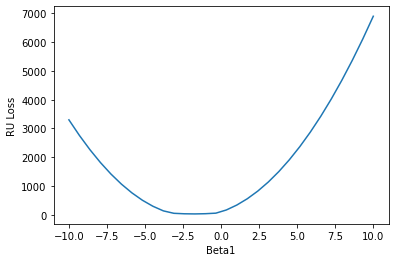

In [49]:
plt.plot(beta_one, losses)
plt.xlabel("Beta1")
plt.ylabel("RU Loss")

In [44]:
n= 100
delta_one = np.linspace(-1000., 1000., n)
beta = torch.Tensor([3., 5.]).reshape(2, 1)
delta_two = 5.
x = torch.Tensor([5., 3.]).reshape(2, 1)
y = torch.Tensor([6.]).reshape(1, 1)
losses = []

for i in range(n):
    delta = torch.Tensor([delta_one[i], delta_two]).reshape(2, 1)
    h_out = h(x, beta)
    alpha_out = alpha(x, delta)
    losses.append(loss_fn(x, y, h_out, alpha_out))


Text(0, 0.5, 'RU Loss')

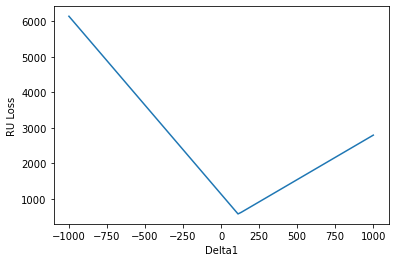

In [45]:
plt.plot(delta_one, losses)
plt.xlabel("Delta1")
plt.ylabel("RU Loss")